__Import the required librares - numpy, pandas, LinearRegression, PCA, etc...__

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
import seaborn as sns

__Use pandas to read in the csv data file and examine the structure__

In [308]:
filename = ("../Downloads/FuelEfficiency.csv")
data = pd.read_csv(filename)

In [282]:
data.shape

(38, 8)

In [283]:
data.tail()

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
33,37.3,2.681,2.130,91,4,69,14.7,0.0
34,30.5,3.279,2.190,97,4,78,14.1,0.0
35,22.0,4.545,2.815,146,6,97,14.5,0.0
36,21.5,4.651,2.600,121,4,110,12.8,0.0
37,31.9,3.135,1.925,89,4,71,14.0,0.0


__Find correlation between the fields and MPG, to identify the important features__

Plot a heat-map using seaborn

Ignore fields with low correlation to mpg

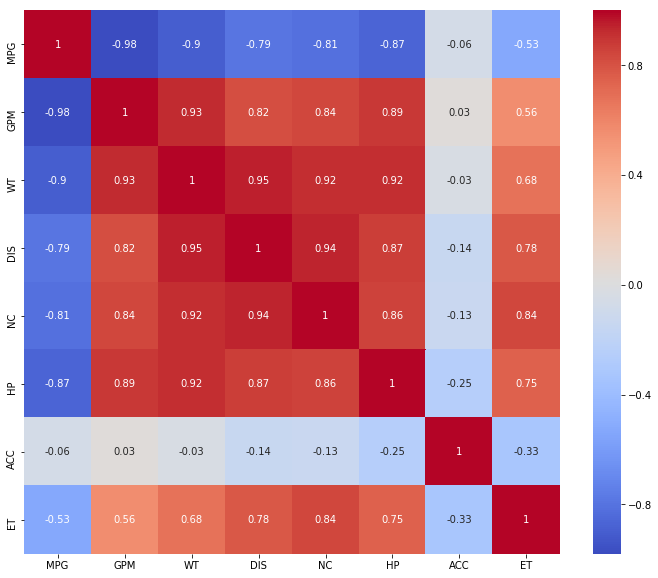

In [304]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().round(2),cmap='coolwarm',annot=True)

In [275]:
data.corr(method="pearson")

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
MPG,1.000000,-0.980797,-0.903071,-0.786048,-0.805511,-0.871282,-0.056774,-0.532251
GPM,-0.980797,1.000000,0.926267,0.822910,0.841188,0.887699,0.033071,0.561305
WT,-0.903071,0.926267,1.000000,0.950765,0.916678,0.917220,-0.033574,0.679413
DIS,-0.786048,0.822910,0.950765,1.000000,0.940281,0.871799,-0.143417,0.776416
NC,-0.805511,0.841188,0.916678,0.940281,1.000000,0.863847,-0.129244,0.844096
HP,-0.871282,0.887699,0.917220,0.871799,0.863847,1.000000,-0.252621,0.747772
ACC,-0.056774,0.033071,-0.033574,-0.143417,-0.129244,-0.252621,1.000000,-0.329097
ET,-0.532251,0.561305,0.679413,0.776416,0.844096,0.747772,-0.329097,1.000000


__Plot a scatter graph between highly correlated fields and examine the relation__


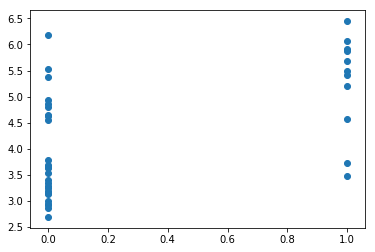

In [284]:
plt.scatter(data['MPG'],data['GPM'])

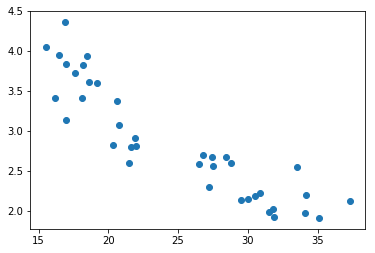

In [10]:
plt.scatter(data['MPG'],data['WT'])

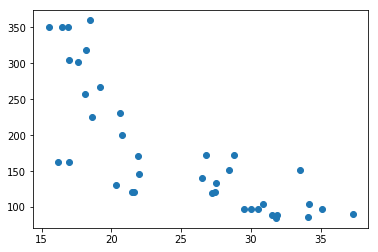

In [11]:
plt.scatter(data['MPG'],data['DIS'])

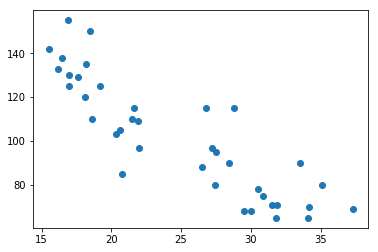

In [13]:
plt.scatter(data['MPG'],data['HP'])

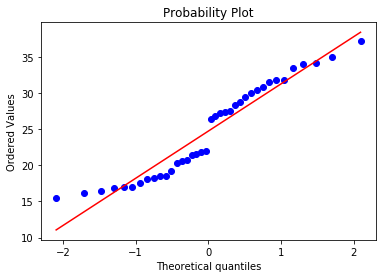

In [280]:
from scipy import stats

res = stats.probplot(data['MPG'], plot=plt)

__Drop the mpg field from the dataset, after creating a seperate array for the target mpg.__

In [309]:
mpg = data['ET']
#data = data.drop(['MPG'], axis=1)
data = data.drop(['ET'], axis=1)
data.head()

,MPG,GPM,WT,DIS,NC,HP,ACC
0,16.9,5.917,4.360,350,8,155,14.9
1,15.5,6.452,4.054,351,8,142,14.3
2,19.2,5.208,3.605,267,8,125,15.0
3,18.5,5.405,3.940,360,8,150,13.0
4,30.0,3.333,2.155,98,4,68,16.5


__Plot the regrssion line between the fields and mpg__

ValueError: num must be 1 <= num <= 6, not 7

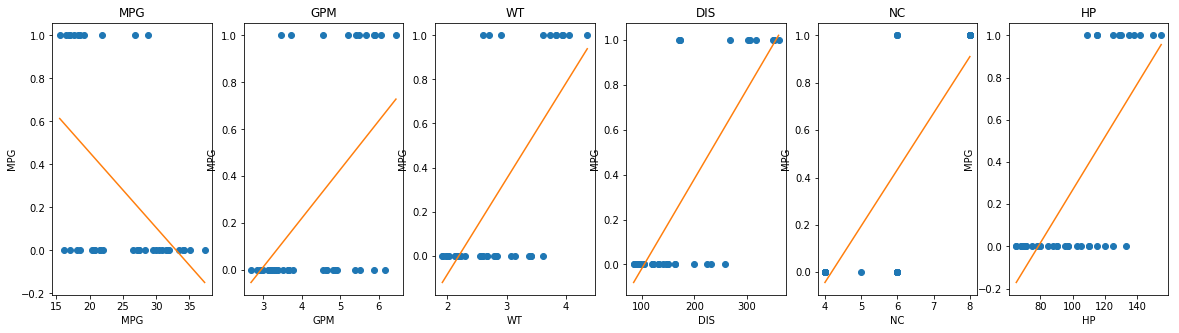

In [310]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(data.columns):
    plt.subplot(1, 6, i+1)
    x = data[col]
    y = mpg
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x, y, 1))(numpy.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MPG')

__Use train_test_split to split the data set into training and test data__

- keep test size as 33%
- use linearregression with correct options
- fit the model and use accuracy_score to check the accuracy

In [311]:
from sklearn.metrics import accuracy_score
array = data.values
X = array[:,:]
Y = mpg
test_size = 0.33
seed = 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
#model = LogisticRegression(penalty='l2')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  : {}". format(finalResult))

The Accuracy Score  : 79.7922036347


__Apply PCA repeat the above steps__
- keep n_components as 5
- check the accuracy score

In [271]:
pca = PCA(n_components=5)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [272]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  : {}". format(finalResult))

The Accuracy Score  : 95.6310812983


In [312]:
from sklearn.metrics import accuracy_score
array = data.values
X = array[:,:]
Y = mpg.astype(int)
test_size = 0.33
seed = 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)


In [313]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
print("LogisticRegression")
#print(Y_test)
preds = clf.predict(X_test)
print(accuracy_score(Y_test,preds))
#print(clf.score(X_test,Y_test))


LogisticRegression
1.0
